# Visualizing Graphical Models

Here we use [daft](https://docs.daft-pgm.org/en/latest/) by David S. Fulford, Dan Foreman-Mackey and David W. Hogg to visualize probabilistic graphical models .



In [1]:
import daft
from matplotlib import rc

rc("font", family="serif", size=12)
rc("text", usetex=True)

## Conditional independence

Random variables $A$ and $B$ are conditionally independent given $C$ if and only if

\begin{equation}
P (A|B, C) = P (A|C) ,
\end{equation}

This is often written $ A \perp\kern-5pt\perp B \mid C$. The graphical model for this situation looks like this:

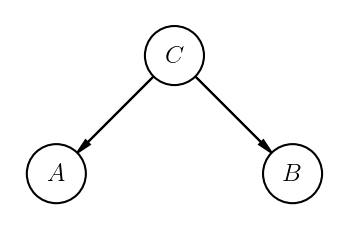

In [7]:
pgm = daft.PGM()
pgm.add_node("A", r"$A$", -1, 0)
pgm.add_node("B", r"$B$", 1, 0)
pgm.add_node("C", r"$C$", 0, 1)
pgm.add_edge("C", "A")
pgm.add_edge("C", "B")
pgm.render(dpi=150)
pgm.savefig("../assets/AperpBmidC.png", dpi=150)

## An weak lensing example

[Origin of Weak Lensing Example](https://docs.daft-pgm.org/en/latest/examples/weaklensing/)

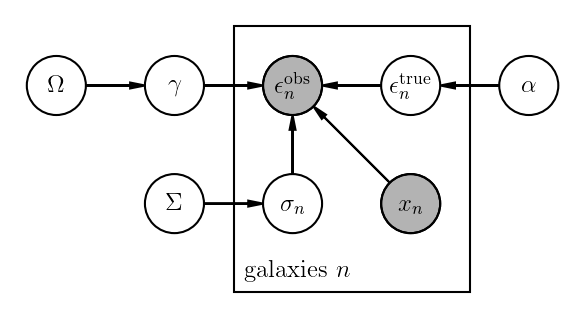

In [2]:
pgm = daft.PGM()
pgm.add_node("Omega", r"$\Omega$", -1, 4)
pgm.add_node("gamma", r"$\gamma$", 0, 4)
pgm.add_node("obs", r"$\epsilon^{\mathrm{obs}}_n$", 1, 4, observed=True)
pgm.add_node("alpha", r"$\alpha$", 3, 4)
pgm.add_node("true", r"$\epsilon^{\mathrm{true}}_n$", 2, 4)
pgm.add_node("sigma", r"$\sigma_n$", 1, 3)
pgm.add_node("Sigma", r"$\Sigma$", 0, 3)
pgm.add_node("x", r"$x_n$", 2, 3, observed=True)
pgm.add_plate([0.5, 2.25, 2, 2.25], label=r"galaxies $n$")
pgm.add_edge("Omega", "gamma")
pgm.add_edge("gamma", "obs")
pgm.add_edge("alpha", "true")
pgm.add_edge("true", "obs")
pgm.add_edge("x", "obs")
pgm.add_edge("Sigma", "sigma")
pgm.add_edge("sigma", "obs")

pgm.render(dpi=150)
#pgm.savefig("weaklensing.pdf")
#pgm.savefig("weaklensing.png", dpi=150)

## An exoplanets example

[Origin of exoplanet example](https://docs.daft-pgm.org/en/latest/examples/exoplanets/)

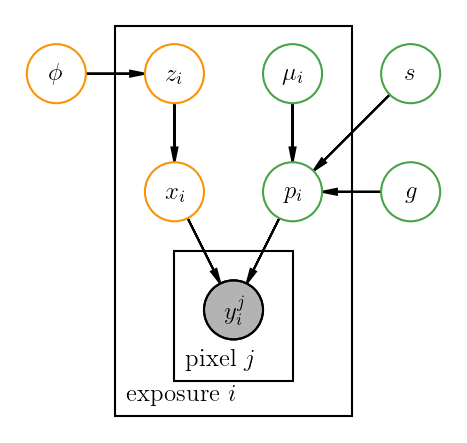

In [3]:
# Colors.
p_color = {"ec": "#46a546"}
s_color = {"ec": "#f89406"}

pgm = daft.PGM()

n = daft.Node("phi", r"$\phi$", 1, 3, plot_params=s_color)
n.va = "baseline"
pgm.add_node(n)
pgm.add_node("speckle_coeff", r"$z_i$", 2, 3, plot_params=s_color)
pgm.add_node("speckle_img", r"$x_i$", 2, 2, plot_params=s_color)

pgm.add_node("spec", r"$s$", 4, 3, plot_params=p_color)
pgm.add_node("shape", r"$g$", 4, 2, plot_params=p_color)
pgm.add_node("planet_pos", r"$\mu_i$", 3, 3, plot_params=p_color)
pgm.add_node("planet_img", r"$p_i$", 3, 2, plot_params=p_color)

pgm.add_node("pixels", r"$y_i ^j$", 2.5, 1, observed=True)

# Edges.
pgm.add_edge("phi", "speckle_coeff")
pgm.add_edge("speckle_coeff", "speckle_img")
pgm.add_edge("speckle_img", "pixels")

pgm.add_edge("spec", "planet_img")
pgm.add_edge("shape", "planet_img")
pgm.add_edge("planet_pos", "planet_img")
pgm.add_edge("planet_img", "pixels")

# And a plate.
pgm.add_plate([1.5, 0.2, 2, 3.2], label=r"exposure $i$", shift=-0.1)
pgm.add_plate([2, 0.5, 1, 1], label=r"pixel $j$", shift=-0.1)

# Render and save.
pgm.render(dpi=150)
#pgm.savefig("exoplanets.pdf")
#pgm.savefig("exoplanets.png", dpi=150)